# Project: TMDb Movie Data
---
## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangle)
 - [General Properties](#general)
 - [Cleaning Data](#clean)
- [Exploratory Data Analysis](#analy)
- [Conclusion](#concl)

<a name='intro'></a>
## Introduction

> In this project, I will explore TMDb movie dataset which contains information about 10,000 movies, go through the data analysis process,<br> and see how everything fits together.

> ### Note that:
 - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
 - There are some odd characters in the ‘cast’ column.
 - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, <br>
accounting for inflation over
time.

> ### Questions to be answered:
> 1. Most and least 
> 1. genres percentage in donut
> 1. Movie market growth trend (total and average budget)
> 1. How many movies were able to break-even?
> 2. Which genres are most popular from year to year?
> 3. Is website becoming an essential element of movie marketing?


> ### Limitation
- Doens't reflect the whole movie market since it's only 10k movies

> ### References to keep:
 - movie break-even https://movies.stackexchange.com/questions/81776/why-is-the-break-even-point-for-movies-usually-twice-the-budget
 - first movie website: https://movies.stackexchange.com/questions/27281/what-was-the-first-website-to-be-created-specifically-to-promote-a-movie
 - dropping 0: https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741

In [1]:
# import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

<a name='wrangle'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

<a name='general'></a>
### General Properties

In [2]:
# load data and check first five rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Number of rows and columns
df.shape

(10866, 21)

In [4]:
# Check datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# number of unique values per each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# number of rows with missing values per each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Number of duplicates
df.duplicated().sum()

1

<a name='clean'></a>
### Cleaning Data
> - Drop unnecessary columns for our investigation
- Drop rows with zero values 
- Drop nulls
- Dedupe

> First, we are dropping unneccessary columns to avoid dropping rows that might have meaningful data in them 

In [8]:
# Define columns to drop
drop_cols = ['id', 'imdb_id','homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj']

df.drop(drop_cols, axis=1, inplace=True)

In [9]:
# Check the shape
df.shape

(10866, 12)

> Next, let's drop rows that contain zeroes since there is no indication whether these zeroes are actually zeroes or just missing.

In [14]:
# Take a look how many rows contain zeroes 
df[(df == 0).any(1)].count()

popularity              7011
budget                  7011
revenue                 7011
original_title          7011
cast                    6939
director                6968
runtime                 7011
genres                  6988
production_companies    6027
vote_count              7011
vote_average            7011
release_year            7011
dtype: int64

In [70]:
# Keep rows with non-zero values everywhere 
df = df[(df != 0).all(1)]

## or dropping rows with any zero values
# drop_zeroes = df[(df == 0).any(1)].index
# df.drop(drop_zeroes, inplace=True)

# Check shape
df.shape

(3855, 12)

> Now, we are going to finish our cleaning by removing nulls and duplicates.

In [65]:
# Check null
df.isnull().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
vote_count               0
vote_average             0
release_year             0
dtype: int64

In [77]:
# drop nulls 
df.dropna(inplace=True)

# check shape
df.shape

(3806, 12)

In [80]:
# check duplicates
df.duplicated().sum()

1

In [81]:
# we have one duplicate, let's check
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [82]:
# dedupe and check shape
df.drop_duplicates(inplace=True)

df.shape

(3805, 12)

> Throughout some cleaning processes, now we have our dataframe with ***3805 rows*** with ***12 columns*** ready to be analyzed.

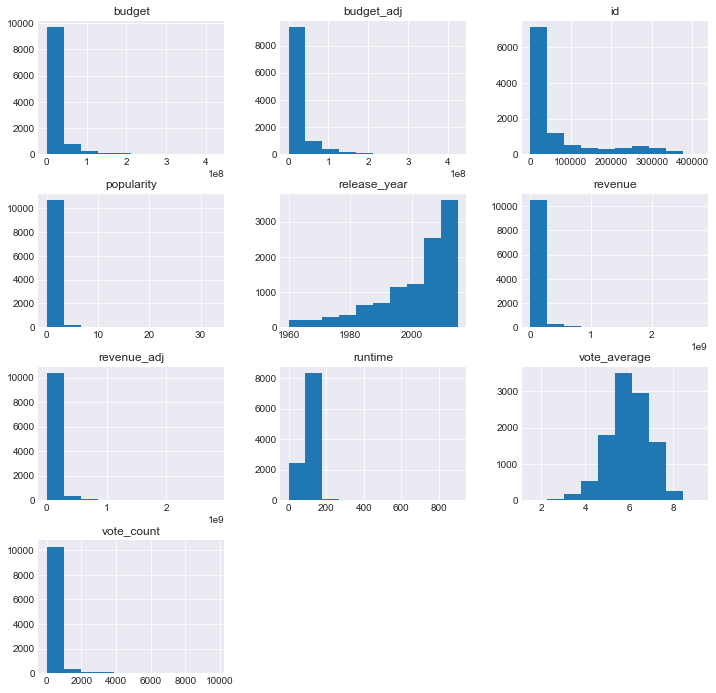

In [85]:
df.hist(figsize=(12, 12));

In [38]:
df.popularity.describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [45]:
df.cast[10]

'Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralph Fiennes|Monica Bellucci'

In [114]:
df.count()

popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
runtime                 10866
genres                  10843
production_companies     9836
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [148]:
df[df==0].count()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
runtime                   31
genres                     0
production_companies       0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [152]:
df[(df != 0).all(axis=1)].count()

popularity              3855
budget                  3855
revenue                 3855
original_title          3855
cast                    3851
homepage                1426
director                3854
runtime                 3855
genres                  3855
production_companies    3809
vote_count              3855
vote_average            3855
release_year            3855
budget_adj              3855
revenue_adj             3855
dtype: int64

In [83]:
df.genres.str.split('|')

0           [Action, Adventure, Science Fiction, Thriller]
1           [Action, Adventure, Science Fiction, Thriller]
2                   [Adventure, Science Fiction, Thriller]
3            [Action, Adventure, Science Fiction, Fantasy]
4                                [Action, Crime, Thriller]
5                    [Western, Drama, Adventure, Thriller]
6           [Science Fiction, Action, Thriller, Adventure]
7                      [Drama, Adventure, Science Fiction]
8                   [Family, Animation, Adventure, Comedy]
9                              [Comedy, Animation, Family]
10                              [Action, Adventure, Crime]
11           [Science Fiction, Fantasy, Action, Adventure]
12                                [Drama, Science Fiction]
13                       [Action, Comedy, Science Fiction]
14                    [Action, Adventure, Science Fiction]
15                        [Crime, Drama, Mystery, Western]
16                               [Crime, Action, Thrille

In [159]:
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [158]:
np.divide(np.array(df.budget),np.array(df.revenue)) 

C:\Users\schoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\schoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.09910614, 0.39636784, 0.37258051, ...,        nan,        nan,
              inf])

In [160]:
df.budget/df.revenue

0        0.099106
1        0.396368
2        0.372581
3        0.096703
4        0.126141
5        0.253307
6        0.351790
7        0.181397
8        0.063973
9        0.204988
10       0.278196
11       0.956586
12       0.406841
13       0.361193
14       0.199283
15       0.282486
16       0.147343
17       0.250674
18       0.175163
19       0.245956
20       0.908936
21       0.327119
22       0.233798
23       0.070218
24       0.209979
25       0.219835
26       0.315014
27       0.200593
28       0.226381
29       0.195980
           ...   
10836         NaN
10837         NaN
10838         NaN
10839         NaN
10840         NaN
10841         inf
10842         NaN
10843         NaN
10844         NaN
10845         NaN
10846         NaN
10847         NaN
10848    0.426250
10849         NaN
10850         NaN
10851         NaN
10852         NaN
10853         NaN
10854         NaN
10855         inf
10856         NaN
10857         NaN
10858         NaN
10859         NaN
10860     

In [ ]:
df[df.homepage.isnull()].query('release_year>=1994').count()